In [796]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier


# import the metrics class
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [797]:
# Load the data using pandas

df = pd.read_excel('C:/Users/dayeo/Documents/GitHub/Afo/Finance assignemnt/Coursework_DATA.xls', sheet_name='Sheet1')

In [798]:
df.head()

,id,dscode,Year,LagExcessReturn,CASH,INVENTORIES,CURRENT_ASSETS,PROPERTY_PLANT_EQUIPMENT,TOTAL_INTANGIBLE,TOTAL_ASSETS,...,OPERATING_INCOME,INTEREST_EXPENSE_ON_DEBT,EBIT,PRETAX_INCOME,INCOME_TAXES,NET_INCOME_BEFORE_EXTRA_ITEMS,NET_INCOME_AVAILABLE_TO_COMMON,OPERATING_CASH_FLOW,MARKET_VALUE,EBTDA
0,505,27947W,2013,-0.035987,107505.0,0.0,117515.0,388.0,597.0,119712,...,-12566,0.0,-9639.0,-9639,0,-9639,-9639,-7468,43710.0,-9370.0
1,778,29262P,2013,1.580063,10284.0,0.0,23615.0,72.0,11571.0,35257,...,-1579,77.0,-1043.0,-1120,-174,-946,-946,97,5390.0,-1090.0
2,1037,30463C,2013,-0.894205,5553.0,1.0,8476.0,64.0,7357.0,16427,...,-542,0.0,-497.0,-497,28,-1413,-1413,-323,8510.0,-485.0
3,1400,35607F,2013,-0.373189,1447.0,0.0,1516.0,250.0,3792.0,5558,...,-892,222.0,-2318.0,-5095,0,-5095,-5095,-189,18660.0,NaN
4,4213,999779,2013,0.090696,16072.0,0.0,16505.0,0.0,32531.0,49555,...,-2956,0.0,-1784.0,-1784,0,-1784,-1784,-744,114290.0,-1746.0


In [799]:
df.shape

(11943, 31)

In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11943 entries, 0 to 11942
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11943 non-null  int64  
 1   dscode                          11943 non-null  object 
 2   Year                            11943 non-null  int64  
 3   LagExcessReturn                 11943 non-null  float64
 4   CASH                            11943 non-null  float64
 5   INVENTORIES                     11943 non-null  float64
 6   CURRENT_ASSETS                  11943 non-null  float64
 7   PROPERTY_PLANT_EQUIPMENT        11943 non-null  float64
 8   TOTAL_INTANGIBLE                11943 non-null  float64
 9   TOTAL_ASSETS                    11943 non-null  int64  
 10  ACCOUNTS_PAYEABLE               11943 non-null  float64
 11  CURRENT_LIABILITIES             11943 non-null  float64
 12  WORKING_CAPITAL                 

![alt text](image.png)

# Liquidity 
Current assets / Total assets <br>
Cash and equivalent / current liabilities <br>
Current assets / current liabilities <br>
Sales / inventory <br>
Current assets / sales<br>
Current assets / total liabilities<br>

# Solvency 
Total Liabilities / sales<br>
Total liabilities / assets<br>
The book value of equity / Total liabilities<br>
Interest/EBITDA <br>


# Market information 
Lag (excess return) <br>
Market capital <br>
Market value / Total Equity <br>


# Profitability 
Net income / Total assets <br>
Net income / Total Equity <br>

# Asset utilisation 
Working capital / sales <br>
Quick assets / sales <br>

# Cash flow 
Operating cash flow / Total liabilities<br>
Operating cash flow / Total assets<br>

# Making the final ratios - Feature Creation 

In [801]:
# Exploring the columns of the dataframe

df.columns

Index(['id', 'dscode', 'Year', 'LagExcessReturn', 'CASH', 'INVENTORIES',
       'CURRENT_ASSETS', 'PROPERTY_PLANT_EQUIPMENT', 'TOTAL_INTANGIBLE',
       'TOTAL_ASSETS', 'ACCOUNTS_PAYEABLE', 'CURRENT_LIABILITIES',
       'WORKING_CAPITAL', 'TOTAL_DEBT', 'TOTAL_LIABILITIES', 'COMMON_EQUITY',
       'TOTAL_SHAREHOLDERS_EQUITY', 'TOTAL_EQUITY', 'NET_SALES', 'COGSD',
       'GROSS_INCOME', 'OPERATING_INCOME', 'INTEREST_EXPENSE_ON_DEBT', 'EBIT',
       'PRETAX_INCOME', 'INCOME_TAXES', 'NET_INCOME_BEFORE_EXTRA_ITEMS',
       'NET_INCOME_AVAILABLE_TO_COMMON', 'OPERATING_CASH_FLOW', 'MARKET_VALUE',
       'EBTDA'],
      dtype='object')

In [802]:
# Creating financial ratios using lambda functions

# Liquidity Ratios

# Liquidity (x1) =  Current assets / Total assets 

df['x1'] = df.apply(lambda x: x['CURRENT_ASSETS'] / x['TOTAL_ASSETS'], axis=1)


# Liquidity  (x2) = Cash and equivalent / current liabilities

df['x2'] = df.apply(lambda x: x['CASH'] / x['CURRENT_LIABILITIES'], axis=1)
# Liquidity (x3) = Current assets / current liabilities

df['x'] = df.apply(lambda x: x['CURRENT_ASSETS'] / x['CURRENT_LIABILITIES'], axis=1)
# Liquidity (x4) = Sales / inventory

# on the first try, I got an error because of division by zero. I had to add a condition to check if the denominator is zero.
df['x4'] = df.apply(lambda x: x['NET_SALES'] / x['INVENTORIES'] if x['INVENTORIES'] != 0 else 0, axis=1)

# Liquidity (x5) = Current assets / sales

df['x5'] = df.apply(lambda x: x['CURRENT_ASSETS'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)

# Liquidity (x6) = Current liabilities / sales

df['x6'] = df.apply(lambda x: x['CURRENT_LIABILITIES'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)

In [803]:
# Solvency ratios 


df['x7'] = df.apply(lambda x: x['TOTAL_LIABILITIES'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)


df['x8'] = df.apply(lambda x: x['TOTAL_LIABILITIES'] / x['TOTAL_ASSETS'] if x['TOTAL_ASSETS'] != 0 else 0, axis=1)


df['x10'] = df.apply(lambda x: x['TOTAL_SHAREHOLDERS_EQUITY'] / x['TOTAL_LIABILITIES'] if x['TOTAL_LIABILITIES'] != 0 else 0, axis=1)


df['x11'] = df.apply(lambda x: x['INTEREST_EXPENSE_ON_DEBT'] / x['EBTDA'] if x['EBTDA'] != 0 else 0, axis=1)

In [804]:
# Market information ratios

df['X12'] = df.apply(lambda x: x['MARKET_VALUE'] / x['TOTAL_EQUITY'] if x['TOTAL_EQUITY'] != 0 else 0, axis=1)



In [805]:

# Profitability Ratios

df['x13'] = df.apply(lambda x: x['NET_INCOME_AVAILABLE_TO_COMMON'] / x['TOTAL_ASSETS'] if x['TOTAL_ASSETS'] != 0 else 0, axis=1)

# Profitability (p2) = Net income / Total Equity

df['x14'] = df.apply(lambda x: x['NET_INCOME_AVAILABLE_TO_COMMON'] / x['TOTAL_EQUITY'] if x['TOTAL_EQUITY'] != 0 else 0, axis=1)


In [806]:
# Asset utilisation (a1) = Working capital / sales

df['x15'] = df.apply(lambda x: x['WORKING_CAPITAL'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)

# Asset utilisation (a2) = Quick assets / sales

df['x16'] = df.apply(lambda x: x['CASH'] / x['NET_SALES'] if x['NET_SALES'] != 0 else 0, axis=1)


In [807]:
# Cash flow (c1) = Operating cash flow / Total liabilities

df['x17'] = df.apply(lambda x: x['OPERATING_CASH_FLOW'] / x['TOTAL_LIABILITIES'] if x['TOTAL_LIABILITIES'] != 0 else 0, axis=1)

# Cash flow (c2) = Operating cash flow / Total assets

df['x18'] = df.apply(lambda x: x['OPERATING_CASH_FLOW'] / x['TOTAL_ASSETS'] if x['TOTAL_ASSETS'] != 0 else 0, axis=1)


In [808]:
df.shape

(11943, 48)

# Cleaning Data
### Excludeing companies that have been listed for less than two years. 


In [809]:
df.columns

Index(['id', 'dscode', 'Year', 'LagExcessReturn', 'CASH', 'INVENTORIES',
       'CURRENT_ASSETS', 'PROPERTY_PLANT_EQUIPMENT', 'TOTAL_INTANGIBLE',
       'TOTAL_ASSETS', 'ACCOUNTS_PAYEABLE', 'CURRENT_LIABILITIES',
       'WORKING_CAPITAL', 'TOTAL_DEBT', 'TOTAL_LIABILITIES', 'COMMON_EQUITY',
       'TOTAL_SHAREHOLDERS_EQUITY', 'TOTAL_EQUITY', 'NET_SALES', 'COGSD',
       'GROSS_INCOME', 'OPERATING_INCOME', 'INTEREST_EXPENSE_ON_DEBT', 'EBIT',
       'PRETAX_INCOME', 'INCOME_TAXES', 'NET_INCOME_BEFORE_EXTRA_ITEMS',
       'NET_INCOME_AVAILABLE_TO_COMMON', 'OPERATING_CASH_FLOW', 'MARKET_VALUE',
       'EBTDA', 'x1', 'x2', 'x', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10', 'x11',
       'X12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18'],
      dtype='object')

In [810]:
df.nunique()
# There're 2092 ids in the dataset
df.id.nunique()


2092

In [811]:
df.Year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [812]:
# Grouping the data by the id column

df.groupby('id')['Year'].count().reset_index().sort_values('Year')

df_grouped = df.groupby('id')['Year'].count().reset_index()



In [813]:
# Checking for id that have less than 2 years

companies_2 = df_grouped[df_grouped['Year'] < 2]

In [814]:

companies_id_2 = companies_2.id.unique()

companies_2.id.nunique()


133

In [815]:
# removing comanies that have less than 2 years from the dataset

df = df[~df['id'].isin(companies_id_2)]

In [816]:
df.shape

(11810, 48)

In [817]:
companies_2.id.unique()

array([  29,   57,   66,  121,  139,  151,  207,  210,  212,  237,  280,
        287,  328,  339,  344,  348,  351,  358,  363,  372,  421,  429,
        440,  441,  460,  477,  510,  514,  519,  529,  530,  546,  559,
        568,  581,  592,  600,  610,  613,  635,  642,  649,  655,  662,
        672,  673,  696,  703,  716,  756,  769,  771,  779,  797,  800,
        839,  872,  886,  887,  894,  926,  930,  933,  947,  967, 1001,
       1027, 1034, 1068, 1073, 1076, 1103, 1104, 1132, 1162, 1175, 1189,
       1198, 1217, 1269, 1290, 1332, 1462, 1679, 1695, 1867, 1885, 1898,
       1915, 1918, 1926, 1937, 1950, 1956, 2018, 2200, 2205, 2231, 2247,
       2318, 2360, 2449, 2513, 2515, 2518, 2533, 2597, 2651, 2666, 2752,
       2835, 2973, 2996, 3021, 3040, 3059, 3105, 3172, 3247, 3367, 3440,
       3466, 3582, 3667, 3673, 3807, 3836, 3978, 3979, 4084, 4096, 4107,
       4116], dtype=int64)

In [818]:
# Checking for conmpanies that were removed at random. I checked for company with id 3667. 

df['id'].where(df['id'] == 3667).count()

0

# Removing Missing Values

In [819]:
df.isnull().sum()

id                                   0
dscode                               0
Year                                 0
LagExcessReturn                      0
CASH                                 0
INVENTORIES                          0
CURRENT_ASSETS                       0
PROPERTY_PLANT_EQUIPMENT             0
TOTAL_INTANGIBLE                     0
TOTAL_ASSETS                         0
ACCOUNTS_PAYEABLE                    0
CURRENT_LIABILITIES                  0
WORKING_CAPITAL                      0
TOTAL_DEBT                           0
TOTAL_LIABILITIES                    0
COMMON_EQUITY                        0
TOTAL_SHAREHOLDERS_EQUITY            0
TOTAL_EQUITY                         0
NET_SALES                            0
COGSD                                0
GROSS_INCOME                         0
OPERATING_INCOME                     0
INTEREST_EXPENSE_ON_DEBT             0
EBIT                                 0
PRETAX_INCOME                        0
INCOME_TAXES             

In [820]:
# Number of fimrs in the dataset

df.id.nunique()

1959

In [821]:
# identifying firms that have missing values in the EBITDA column


companies_missing = df[df.isnull().any(axis=1)]

companies_missing.id.nunique()



949

In [822]:

# Removing firms with missing values using id

df = df[~df['id'].isin(companies_missing.id.unique())]


In [823]:
print(df.shape)
print(df.id.nunique())

(7142, 48)
1010


In [824]:
# Winsorizing the data between the 1st and 99th percentile

df_winsorized = df.copy()
df_winsorized.apply(lambda x: winsorize(x, limits=[0.01, 0.01]), )

C:\Users\dayeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\_lib\_util.py:729: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for el in a.ravel():


,id,dscode,Year,LagExcessReturn,CASH,INVENTORIES,CURRENT_ASSETS,PROPERTY_PLANT_EQUIPMENT,TOTAL_INTANGIBLE,TOTAL_ASSETS,...,x8,x10,x11,X12,x13,x14,x15,x16,x17,x18
4,4161,974847,2013,0.090696,16072.0,0.0,16505.0,0.0,32531.0,49555,...,0.021148,46.285305,-0.000000,2.356155,-0.036000,-0.036778,39.077889,40.381910,-0.709924,-0.015014
5,2777,900998,2013,-0.163253,799000.0,1478800.0,5082000.0,6571925.0,2782000.0,16611966,...,0.570432,0.590122,0.177910,1.288452,0.048820,0.091229,0.107143,0.070285,0.194069,0.110703
7,789,29327F,2013,-0.021696,44411.0,8158.0,89835.0,591239.0,0.0,681075,...,0.514801,0.942496,-1.929914,0.775647,-0.144900,-0.204567,-0.134600,0.180133,0.466739,0.240278
10,3635,917509,2013,0.544170,65000.0,142100.0,467100.0,321000.0,86300.0,913100,...,0.658416,0.500499,0.154113,1.763714,0.062863,0.129688,0.053450,0.033342,0.081337,0.053554
12,1662,506343,2013,0.240877,82224.0,24897.0,302064.0,832111.0,956580.0,2091202,...,0.659206,0.505743,0.179489,2.060030,0.024334,0.040403,-0.015842,0.128635,0.274969,0.181261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11938,1087,30857U,2020,0.155650,15134.0,79.0,83063.0,12808.0,237624.0,333495,...,1.028897,-0.028085,0.027338,-9.755330,0.227602,-6.257971,-0.943414,0.056207,0.317624,0.326803
11939,355,261789,2020,-0.412334,280.0,0.0,1420.0,20.0,1792.0,3232,...,0.128094,6.806763,0.000000,1.462030,0.047339,0.054294,0.766244,0.221870,0.458937,0.058787
11940,1820,51921C,2020,-0.124651,5504.0,0.0,7113.0,200.0,4922.0,12234,...,0.349109,1.864435,-0.012493,2.469680,-0.459702,-0.620066,7.023041,8.454685,-1.348396,-0.470737
11941,149,136904,2020,0.374340,2531.0,3933.0,16405.0,2865.0,5653.0,24923,...,0.321952,2.106057,-0.000000,3.231552,-0.112948,-0.166578,0.257021,0.076930,0.202891,0.065321


In [825]:
# Creating a new column to mark financially distressed firms



df_winsorized['Condition_1'] = df_winsorized['INTEREST_EXPENSE_ON_DEBT'] > df_winsorized['EBTDA']

df_winsorized['Distress_Condition_1'] = df_winsorized.groupby('id')['Condition_1'].rolling(window=2).apply(lambda x: all(x)).reset_index(0, drop=True)



In [826]:
df_winsorized['Previous_Market_Value'] = df_winsorized.groupby('id')['MARKET_VALUE'].shift(1)

df_winsorized['Market_Growth'] = df_winsorized['MARKET_VALUE'] - df_winsorized['Previous_Market_Value']

df_winsorized['Condition_2'] = df_winsorized['Market_Growth'] < 0 

df_winsorized['Distress_Condition_2'] = df_winsorized.groupby('id')['Condition_2'].rolling(window=2).apply(lambda x: all(x)).reset_index(0, drop=True)


In [827]:

df_winsorized['D'] = ((df_winsorized['Distress_Condition_1'] == 1) & (df_winsorized['Distress_Condition_2'] == 1)).astype(int)



In [828]:
# Knowing how many firms are financially distressed or not 

df_winsorized['D'].value_counts()



D
0    6801
1     341
Name: count, dtype: int64

In [829]:
df_winsorized.groupby('id')['D'].apply(lambda x: (x == 0).sum() > 1).sum()


1010

In [830]:
df_winsorized.groupby('id')['D'].apply(lambda x: (x == 1).sum() > 1).sum()


81

In [831]:
# Dropping columns used for calculations


df_winsorized.drop(['Condition_1', 'Distress_Condition_1', 'Previous_Market_Value', 'Market_Growth', 'Condition_2', 'Distress_Condition_2'],axis= 1, inplace=True)

In [832]:
# Dropping columns that are not needed for the model

df_winsorized.drop(['dscode',], axis=1, inplace=True)

In [833]:
# df_winsorized.info()


# Feature Engineering

Earlier the finicial ratios were created as new features. 

## Feature selection can be done based on: 
## 1. Feature importance to the predicitve power of the model being used.


There are verarying strategies used when selecting feautres. For our selection process we'll be focusing on using objective statistical methods. 

# Splitting Data in to train and test samples

In [834]:
df_winsorized.Year.value_counts()

Year
2014    917
2013    900
2018    899
2017    891
2019    891
2015    883
2016    881
2020    880
Name: count, dtype: int64

In [835]:
# Dividing the data in the training and test sample. 
df_winsorized.Year = pd.to_datetime(df_winsorized.Year, format='%Y')


# Splitting the data into training and test sets
# Training set from the year 2015 to 2018 

df_train = df_winsorized[(df_winsorized.Year > "2014-01-01") & (df_winsorized.Year < "2019-01-01")]

# Test set from the year 2019 to 2020

df_test = df_winsorized[df_winsorized.Year > "2018-01-01"]



In [836]:
df_train.Year.value_counts()


Year
2018-01-01    899
2017-01-01    891
2015-01-01    883
2016-01-01    881
Name: count, dtype: int64

In [837]:
df_test.Year.value_counts()

Year
2019-01-01    891
2020-01-01    880
Name: count, dtype: int64

In [838]:
# drop year column from training set

df_train.drop(['Year'], axis = 1, inplace = True)
df_test.drop(['Year'], axis = 1, inplace = True)


C:\Users\dayeo\AppData\Local\Temp\ipykernel_25780\521649643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['Year'], axis = 1, inplace = True)
C:\Users\dayeo\AppData\Local\Temp\ipykernel_25780\521649643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['Year'], axis = 1, inplace = True)


In [839]:
X_train = df_train.drop(['D', 'id'], axis=1)

y_train = df_train['D']

X_test = df_test.drop(['D', 'id'], axis=1)

y_test = df_test['D']

In [840]:
print(X_train.shape)
print(y_train.shape) 

(3554, 45)
(3554,)


# Model Selection and Development

## We're going to be using the following models. 

1. Decision Tree regresssion  <br>
2. Radom Forest<br>
3. Logistic Regression <br>

# Traning without feature selection

# Decision Tree classifier 

In [841]:
# adding parameters to the DecisionTree classifier 
dtc = DecisionTreeClassifier(criterion= 'entropy', random_state=42, class_weight='balanced', max_depth= None, min_samples_leaf =  10, min_samples_split= 310, )

# fit the classifier with the training data
dtc.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=10, min_samples_split=310,
                       random_state=42)

In [842]:
# make predictions on the training data
y_pred_train = dtc.predict(X_train)

# make predictions on the test data
y_pred_test = dtc.predict(X_test)


In [843]:
# calculate the accuracy of the model
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)


# calculate the accuracy of the model

accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy on training data: {accuracy_train}")
print(f"Accuracy on test data: {accuracy_test}")


# First results, Accuracy on training data: 0.9286563614744352, Accuracy on test data: 0.9097490347490348 
# This means that the model is underfitting or overfitting. 

#Second result, Accuracy on training data: 0.7598097502972652, Accuracy on test data: 0.8137065637065637
# This means that the model is underfitting or overfitting. 

# Accuracy on training data: 0.9191438763376932
#Accuracy on test data: 0.8643822393822393# This means that the model is underfitting or overfitting.


Accuracy on training data: 0.8238604389420371
Accuracy on test data: 0.8413325804630153


In [844]:
df_winsorized.D.value_counts()

D
0    6801
1     341
Name: count, dtype: int64

In [845]:
# Checking for overfitting or underfitting

# first results were as in the comment below: 
# [[1885    0]
# [ 187    0]]
#Precision: 0.0
#Recall: 0.0
#F1 Score: 0.0

# The model is not overfitting or underfitting, it's failing to correctly classify instances of one class(class 1) entirely . 

"""Precision = TP / (TP + FP). 
Precision is 0 because there are no True Positives (i.e., the model did not correctly predict any instances of class 1).
Recall = TP / (TP + FN). Recall is also 0 for the same reason.
F1 Score is the harmonic mean of Precision and Recall. Since both Precision and Recall are 0, the F1 Score is also 0.

The model is predicting all instances as class 0, which means it's not able to correctly identify any instances of class 1. 
This is a problem of model performance,
"""

# There's a case of imbalance of the classes in the dataset.
# To solve this problem, we can use the class_weight parameter in the DecisionTreeClassifier class to assign weights to the classes based on their frequency in the dataset.

# Second results were as in the comment below:
#[[1523  362]
#[  24  163]]
#Precision: 0.31047619047619046
#Recall: 0.8716577540106952
#F1 Score: 0.45786516853932585 

# The model is not overfitting or underfitting, these indicate that the model is doing a good job of identifying the positive class (high recall), 
# but when it predicts an instance is positive, it's only correct about 31% of the time (low precision). 


# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix = confusion_matrix(y_test, y_pred_test)

# print the confusion matrix
print(conf_matrix)


# calculate the precision, recall, and f1 score
precision = metrics.precision_score(y_test, y_pred_test)

recall = metrics.recall_score(y_test, y_pred_test)

f1_score = metrics.f1_score(y_test, y_pred_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


[[1374  256]
 [  25  116]]
Precision: 0.3118279569892473
Recall: 0.8226950354609929
F1 Score: 0.4522417153996101


In [846]:

# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# calculate the Type 1 error (T1)
T1 = FP / (FP + TN)

# calculate the Type 2 error (T2)
T2 = FN / (FN + TP)

# calculate the total accuracy
total_accuracy = (TP + TN) / (TP + TN + FP + FN)   

# calculate the AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)

AUC = metrics.auc(fpr, tpr)

# print the performance measures
print(f"Type 1 error: {T1}")
print(f"Type 2 error: {T2}")
print(f"Total accuracy: {total_accuracy}")
print(f"AUC: {AUC}")

# First results shown in the comment below:
# Type 1 error: 0.0
#Type 2 error: 1.0.  
#Total accuracy: 0.9097490347490348
# AUC: 0.5,     
# Type 1: A value of 0.0 means that there were no instances that were incorrectly predicted as positive (i.e., no false positives)
# Type 2: A value of 1.0 means that all actual positive instances were incorrectly predicted as negative
# An AUC of 0.5 suggests no discrimination, i.e., 
# the model is not able to distinguish between positive and negative instances any better than random guessing.

# Second results shown in the comment below:
#Type 1 error: 0.1920424403183024
#Type 2 error: 0.12834224598930483
#Total accuracy: 0.8137065637065637
#AUC: 0.8398076568461963

# Type 1: A value of 0.19 means that 19% of actual negative instances were incorrectly predicted as positive
# Type 2: A value of 0.13 means that 13% of actual positive instances were incorrectly predicted as negative
# An AUC of 0.84 suggests that the model is able to distinguish between positive and negative instances with a good degree of accuracy.


Type 1 error: 0.1570552147239264
Type 2 error: 0.1773049645390071
Total accuracy: 0.8413325804630153
AUC: 0.8328199103685332


# Radom Forest Classifier

In [847]:
rfc = RandomForestClassifier(criterion = "entropy" , n_estimators = 10, max_depth= 5, min_samples_split= 10,  class_weight='balanced', random_state= 42 )



rfc.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=10, n_estimators=10,
                       random_state=42)

In [848]:
# Use the best model to make predictions
y_pred_rfc_train = rfc.predict(X_train)

# Use the best model to make predictions
y_pred_rfc_test = rfc.predict(X_test)


In [849]:
# Calculate the accuracy of the model
accuracy_rfc_train = metrics.accuracy_score(y_train, y_pred_rfc_train)

# Calculate the accuracy of the model
accuracy_rfc_test = metrics.accuracy_score(y_test, y_pred_rfc_test)

print(f"Accuracy on training data: {accuracy_rfc_train}")
print(f"Accuracy on test data: {accuracy_rfc_test}")

Accuracy on training data: 0.8607203151378728
Accuracy on test data: 0.862789384528515


In [850]:
# checking for overfitting or underfitting

# First results shown in the comment below:
# [[1885    0]
# [ 187    0]]
# Precision: 0.0
# Recall: 0.0
# F1 Score: 0.0

# The model is not overfitting or underfitting, it's failing to correctly classify instances of one class(class 1) entirely .

# Second results shown in the comment below:
#[[1885    0]
#[ 187    0]]
#Precision: 0.0
#Recall: 0.0
#F1 Score: 0.0

# The model is not overfitting or underfitting, it's failing to correctly classify instances of one class(class 1) entirely .

# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc_test)

# print the confusion matrix
print(conf_matrix_rfc)

# calculate the precision, recall, and f1 score
precision_rfc = metrics.precision_score(y_test, y_pred_rfc_test)

recall_rfc = metrics.recall_score(y_test, y_pred_rfc_test)

f1_score_rfc = metrics.f1_score(y_test, y_pred_rfc_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print(f"F1 Score: {f1_score_rfc}")


[[1420  210]
 [  33  108]]
Precision: 0.33962264150943394
Recall: 0.7659574468085106
F1 Score: 0.47058823529411764


In [851]:


# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP_rfc = conf_matrix_rfc[1, 1]
TN_rfc = conf_matrix_rfc[0, 0]
FP_rfc = conf_matrix_rfc[0, 1]
FN_rfc = conf_matrix_rfc[1, 0]

# calculate the Type 1 error (T1)
T1_rfc = FP_rfc / (FP_rfc + TN_rfc)

# calculate the Type 2 error (T2)
T2_rfc = FN_rfc / (FN_rfc + TP_rfc)

# calculate the total accuracy
total_accuracy_rfc = (TP_rfc + TN_rfc) / (TP_rfc + TN_rfc + FP_rfc + FN_rfc)

# calculate the AUC
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, y_pred_rfc_test)

AUC_rfc = metrics.auc(fpr_rfc, tpr_rfc)

# print the performance measures
print(f"Type 1 error: {T1_rfc}")
print(f"Type 2 error: {T2_rfc}")
print(f"Total accuracy: {total_accuracy_rfc}")
print(f"AUC: {AUC_rfc}")

# First results shown in the comment below:

Type 1 error: 0.12883435582822086
Type 2 error: 0.23404255319148937
Total accuracy: 0.862789384528515
AUC: 0.8185615454901448


# Logistic Regression <br>


In [852]:
lg = LogisticRegression(n_jobs=-1,  class_weight='balanced')
lg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', n_jobs=-1)

In [853]:
# make predictions on the training data
y_pred_train = lg.predict(X_train)

# make predictions on the test data
y_pred_test = lg.predict(X_test)



In [854]:

# calculate the accuracy of the model
accuracy_lg_train = metrics.accuracy_score(y_train, y_pred_train)

# calculate the accuracy of the model
accuracy_lg_test = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy on training data: {accuracy_lg_train}")
print(f"Accuracy on test data: {accuracy_lg_test}")


Accuracy on training data: 0.8505908835115363
Accuracy on test data: 0.8458498023715415


In [855]:

# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_lg = confusion_matrix(y_test, y_pred_test)

# print the confusion matrix
print(conf_matrix_lg)

# calculate the precision, recall, and f1 score
precision_lg = metrics.precision_score(y_test, y_pred_test)

recall_lg = metrics.recall_score(y_test, y_pred_test)

f1_score_lg = metrics.f1_score(y_test, y_pred_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision_lg}")
print(f"Recall: {recall_lg}")
print(f"F1 Score: {f1_score_lg}")


[[1403  227]
 [  46   95]]
Precision: 0.2950310559006211
Recall: 0.6737588652482269
F1 Score: 0.4103671706263499


In [856]:

# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP_lg = conf_matrix_lg[1, 1]
TN_lg = conf_matrix_lg[0, 0]
FP_lg = conf_matrix_lg[0, 1]
FN_lg = conf_matrix_lg[1, 0]

# calculate the Type 1 error (T1)
T1_lg = FP_lg / (FP_lg + TN_lg)

# calculate the Type 2 error (T2)
T2_lg = FN_lg / (FN_lg + TP_lg)

# calculate the total accuracy
total_accuracy_lg = (TP_lg + TN_lg) / (TP_lg + TN_lg + FP_lg + FN_lg)

# calculate the AUC
fpr_lg, tpr_lg, thresholds_lg = metrics.roc_curve(y_test, y_pred_test)

AUC_lg = metrics.auc(fpr_lg, tpr_lg)

# print the performance measures
print(f"Type 1 error: {T1_lg}")
print(f"Type 2 error: {T2_lg}")
print(f"Total accuracy: {total_accuracy_lg}")
print(f"AUC: {AUC_lg}")



Type 1 error: 0.1392638036809816
Type 2 error: 0.3262411347517731
Total accuracy: 0.8458498023715415
AUC: 0.7672475307836226


In [859]:
import pandas as pd

# Create a dictionary with the performance scores
performance_scores = {
    'Model': ['Decision Trees', 'Random Forest', 'Logistic Regression'],
    'Accuracy (Train)': [accuracy_train, accuracy_rfc_train, accuracy_lg_train],
    'Accuracy (Test)': [accuracy_test, accuracy_rfc_test, accuracy_lg_test],
    'Precision': [precision, precision_rfc, precision_lg],
    'Recall': [recall, recall_rfc, recall_lg],
    'F1 Score': [f1_score, f1_score_rfc, f1_score_lg],
    'Type 1 Error': [T1, T1_rfc, T1_lg],
    'Type 2 Error': [T2, T2_rfc, T2_lg],
    'Total Accuracy': [total_accuracy, total_accuracy_rfc, total_accuracy_lg],
    'AUC': [AUC, AUC_rfc, AUC_lg]
}

# Create a DataFrame from the dictionary
df_performance = pd.DataFrame(performance_scores)

# Display the DataFrame
df_performance


,Model,Accuracy (Train),Accuracy (Test),Precision,Recall,F1 Score,Type 1 Error,Type 2 Error,Total Accuracy,AUC
0,Decision Trees,0.823860,0.841333,0.311828,0.822695,0.452242,0.157055,0.177305,0.841333,0.832820
1,Random Forest,0.860720,0.862789,0.339623,0.765957,0.470588,0.128834,0.234043,0.862789,0.818562
2,Logistic Regression,0.850591,0.845850,0.295031,0.673759,0.410367,0.139264,0.326241,0.845850,0.767248


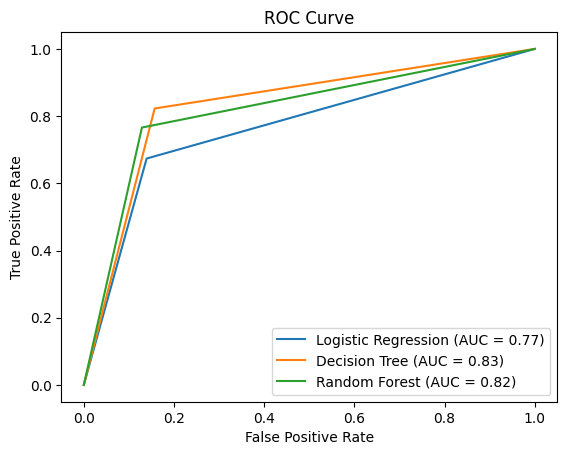

In [860]:
# Plot ROC curves for Logistic regression, KNN and Decision Tree on the same graph

# Plot the ROC curve for the Logistic Regression model

plt.plot(fpr_lg, tpr_lg,  label= 'Logistic Regression (AUC = %0.2f)' % AUC_lg)

# Plot the ROC curve for the Decision Tree model

plt.plot(fpr, tpr,  label='Decision Tree (AUC = %0.2f)' % AUC)

# Plot the ROC curve for the Random Forest model

plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = %0.2f)' % AUC_rfc)


# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add a legend
plt.legend()

# Show the plot
plt.show()



# Feature Selection 

# Main varaible groups 

### 1. Accounting Varaibles 
### 2. Market Varaibles 
### 3. Finicial ratios 

# Using Feature importance from the models

Decision Trees Classifier

In [861]:
importances_dtc = dtc.feature_importances_

In [862]:
indices_dtc = np.argsort(importances_dtc)[::-1]

# To get the top 5 features
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices_dtc[f], importances_dtc[indices_dtc[f]]))

1. feature 21 (0.665790)
2. feature 37 (0.119214)
3. feature 0 (0.099340)
4. feature 26 (0.064310)
5. feature 7 (0.028760)
6. feature 25 (0.022587)
7. feature 27 (0.000000)
8. feature 12 (0.000000)
9. feature 17 (0.000000)
10. feature 16 (0.000000)


In [863]:
X_train.iloc[:, indices_dtc[:10]]


,PRETAX_INCOME,x11,LagExcessReturn,MARKET_VALUE,ACCOUNTS_PAYEABLE,OPERATING_CASH_FLOW,EBTDA,COMMON_EQUITY,GROSS_INCOME,COGSD
345,20300,0.236136,0.406685,4833400.0,83000.0,144400,223600.0,1499500,184200.0,169500.0
346,-20129,-0.605770,-1.130674,63250.0,2946.0,16549,-13033.0,54558,5536.0,1819.0
347,-6080,-0.027120,-0.099303,57560.0,676.0,-2342,-5236.0,36490,3214.0,4597.0
350,-1589,-0.000000,0.641573,7670.0,118.0,-865,-1082.0,26603,125.0,505.0
352,-11797,-0.455241,-0.743901,54730.0,2688.0,5596,-4312.0,74194,-5549.0,6060.0
...,...,...,...,...,...,...,...,...,...,...
11658,334300,0.033281,0.156835,3867330.0,40200.0,277400,381600.0,1375100,1208600.0,84300.0
11660,10572,0.059928,0.532658,286390.0,2630.0,18456,15769.0,60358,29847.0,52566.0
11663,-163,0.004049,0.247360,5280.0,294.0,684,247.0,4893,10198.0,567.0
11665,27397,0.010412,0.113012,526770.0,6817.0,17295,39570.0,227764,139438.0,117712.0


In [864]:
X_train_selected = X_train.iloc[:, indices_dtc[:10]]
X_test_selected = X_test.iloc[:, indices_dtc[:10]]

dtc.fit(X_train_selected, y_train)



DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=10, min_samples_split=310,
                       random_state=42)

In [865]:

# Use the best model to make predictions
y_pred_dtc_train = dtc.predict(X_train_selected)

# Use the best model to make predictions
y_pred_dtc_test = dtc.predict(X_test_selected)



In [866]:

# Calculate the accuracy of the model
accuracy_dtc_train = metrics.accuracy_score(y_train, y_pred_dtc_train)

# Calculate the accuracy of the model
accuracy_dtc_test = metrics.accuracy_score(y_test, y_pred_dtc_test)

print(f"Accuracy on training data: {accuracy_dtc_train}")
print(f"Accuracy on test data: {accuracy_dtc_test}")


Accuracy on training data: 0.8238604389420371
Accuracy on test data: 0.8413325804630153


In [867]:


# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc_test) 

# print the confusion matrix
print(conf_matrix_dtc)

# calculate the precision, recall, and f1 score
precision_dtc = metrics.precision_score(y_test, y_pred_dtc_test)

recall_dtc = metrics.recall_score(y_test, y_pred_dtc_test)

f1_score_dtc = metrics.f1_score(y_test, y_pred_dtc_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision_dtc}")
print(f"Recall: {recall_dtc}")
print(f"F1 Score: {f1_score_dtc}")


[[1374  256]
 [  25  116]]
Precision: 0.3118279569892473
Recall: 0.8226950354609929
F1 Score: 0.4522417153996101


In [868]:

# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values

TP_dtc = conf_matrix_dtc[1, 1]
TN_dtc = conf_matrix_dtc[0, 0]
FP_dtc = conf_matrix_dtc[0, 1]
FN_dtc = conf_matrix_dtc[1, 0]

# calculate the Type 1 error (T1)
T1_dtc = FP_dtc / (FP_dtc + TN_dtc)

# calculate the Type 2 error (T2)
T2_dtc = FN_dtc / (FN_dtc + TP_dtc)

# calculate the total accuracy
total_accuracy_dtc = (TP_dtc + TN_dtc) / (TP_dtc + TN_dtc + FP_dtc + FN_dtc)

# calculate the AUC
fpr_dtc, tpr_dtc, thresholds_dtc = metrics.roc_curve(y_test, y_pred_dtc_test)

AUC_dtc = metrics.auc(fpr_dtc, tpr_dtc)

# print the performance measures
print(f"Type 1 error: {T1_dtc}")
print(f"Type 2 error: {T2_dtc}")
print(f"Total accuracy: {total_accuracy_dtc}")
print(f"AUC: {AUC_dtc}")




Type 1 error: 0.1570552147239264
Type 2 error: 0.1773049645390071
Total accuracy: 0.8413325804630153
AUC: 0.8328199103685332


Random forest Classifier

In [869]:
importances_rfc = rfc.feature_importances_

In [870]:
indices_rfc = np.argsort(importances_rfc)[::-1]

# To get the top 5 features
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices_rfc[f], importances_rfc[indices_rfc[f]]))

1. feature 39 (0.147105)
2. feature 37 (0.133568)
3. feature 24 (0.117894)
4. feature 0 (0.108487)
5. feature 23 (0.088797)
6. feature 44 (0.072871)
7. feature 40 (0.064189)
8. feature 21 (0.031921)
9. feature 35 (0.024542)
10. feature 38 (0.022973)


In [871]:
X_train.iloc[:, indices_rfc[:10]]

,x13,x11,NET_INCOME_AVAILABLE_TO_COMMON,LagExcessReturn,NET_INCOME_BEFORE_EXTRA_ITEMS,x18,x14,PRETAX_INCOME,x8,X12
345,0.004739,0.236136,15100,0.406685,15100,0.045318,0.006414,20300,0.521121,2.053184
346,-0.652075,-0.605770,-53240,-1.130674,-53240,0.202690,-0.975842,-20129,0.331782,1.159317
347,-0.132947,-0.027120,-5464,-0.099303,-5464,-0.056984,-0.148814,-6080,0.112144,1.567666
350,-0.048069,-0.000000,-1485,0.641573,-1485,-0.028000,-0.053994,-1589,0.109734,0.278879
352,-0.048856,-0.455241,-6912,-0.743901,-6912,0.039554,-0.093161,-11797,0.475576,0.737661
...,...,...,...,...,...,...,...,...,...,...
11658,0.120408,0.033281,296600,0.156835,296600,0.112613,0.188461,334300,0.442618,2.457320
11660,0.062745,0.059928,7615,0.532658,7615,0.152071,0.086038,10572,0.502670,3.235789
11663,-0.022252,0.004049,-251,0.247360,-251,0.060638,-0.051224,-163,0.566223,1.077551
11665,0.061445,0.010412,20855,0.113012,20855,0.050957,0.091564,27397,0.328935,2.312789


In [872]:
X_train_selected_rfc = X_train.iloc[:, indices_rfc[:10]]
X_test_selected_rfc = X_test.iloc[:, indices_rfc[:10]]

rfc.fit(X_train_selected_rfc, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=10, n_estimators=10,
                       random_state=42)

In [873]:

# Use the best model to make predictions
y_pred_rfc_train = rfc.predict(X_train_selected_rfc)

# Use the best model to make predictions
y_pred_rfc_test = rfc.predict(X_test_selected_rfc)



In [874]:

# Calculate the accuracy of the model
accuracy_rfc_train = metrics.accuracy_score(y_train, y_pred_rfc_train)

# Calculate the accuracy of the model
accuracy_rfc_test = metrics.accuracy_score(y_test, y_pred_rfc_test)

print(f"Accuracy on training data: {accuracy_rfc_train}")
print(f"Accuracy on test data: {accuracy_rfc_test}")


Accuracy on training data: 0.8505908835115363
Accuracy on test data: 0.8644833427442123


In [875]:

# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc_test)

# print the confusion matrix
print(conf_matrix_rfc)

# calculate the precision, recall, and f1 score
precision_rfc = metrics.precision_score(y_test, y_pred_rfc_test)

recall_rfc = metrics.recall_score(y_test, y_pred_rfc_test)

f1_score_rfc = metrics.f1_score(y_test, y_pred_rfc_test)

# print the precision, recall, and f1 score

print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print(f"F1 Score: {f1_score_rfc}")


[[1411  219]
 [  21  120]]
Precision: 0.35398230088495575
Recall: 0.851063829787234
F1 Score: 0.5


In [876]:


# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP_rfc = conf_matrix_rfc[1, 1]
TN_rfc = conf_matrix_rfc[0, 0]
FP_rfc = conf_matrix_rfc[0, 1]
FN_rfc = conf_matrix_rfc[1, 0]

# calculate the Type 1 error (T1)
T1_rfc = FP_rfc / (FP_rfc + TN_rfc)

# calculate the Type 2 error (T2)
T2_rfc = FN_rfc / (FN_rfc + TP_rfc)

# calculate the total accuracy
total_accuracy_rfc = (TP_rfc + TN_rfc) / (TP_rfc + TN_rfc + FP_rfc + FN_rfc)

# calculate the AUC
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, y_pred_rfc_test)

AUC_rfc = metrics.auc(fpr_rfc, tpr_rfc)

# print the performance measures
print(f"Type 1 error: {T1_rfc}")
print(f"Type 2 error: {T2_rfc}")
print(f"Total accuracy: {total_accuracy_rfc}")
print(f"AUC: {AUC_rfc}")

Type 1 error: 0.1343558282208589
Type 2 error: 0.14893617021276595
Total accuracy: 0.8644833427442123
AUC: 0.8583540007831876


Logistic Regression 

In [877]:
importance_lg = lg.coef_[0]

In [878]:
indices_lg = np.argsort(importance_lg)[::-1]

# To get the top 5 features
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices_lg[f], importance_lg[indices_lg[f]]))


1. feature 11 (0.000057)
2. feature 13 (0.000036)
3. feature 25 (0.000030)
4. feature 19 (0.000029)
5. feature 9 (0.000026)
6. feature 14 (0.000023)
7. feature 7 (0.000020)
8. feature 31 (0.000018)
9. feature 8 (0.000012)
10. feature 15 (0.000012)


In [879]:
X_train.iloc[:, indices_lg[:15]]

,TOTAL_LIABILITIES,TOTAL_SHAREHOLDERS_EQUITY,OPERATING_CASH_FLOW,INTEREST_EXPENSE_ON_DEBT,WORKING_CAPITAL,TOTAL_EQUITY,ACCOUNTS_PAYEABLE,x4,CURRENT_LIABILITIES,NET_SALES,INVENTORIES,EBIT,PROPERTY_PLANT_EQUIPMENT,TOTAL_INTANGIBLE,NET_INCOME_AVAILABLE_TO_COMMON
345,1660500,1499500,144400,52800.0,76000.0,2354100,83000.0,8.463663,396300.0,582300,68800.0,47800.0,1380200.0,1333200.0,15100
346,27089,54558,16549,7895.0,60835.0,54558,2946.0,5.346282,13943.0,14451,2703.0,-12235.0,189.0,6670.0,-53240
347,4609,36490,-2342,142.0,11688.0,36717,676.0,0.000000,2346.0,8655,0.0,-5938.0,3189.0,23876.0,-5464
350,3390,26603,-865,0.0,2517.0,27503,118.0,28.425000,501.0,1137,40.0,-1589.0,2580.0,25292.0,-1485
352,67283,74194,5596,1963.0,27568.0,74194,2688.0,14.094567,35153.0,7005,497.0,-9834.0,13706.0,65036.0,-6912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,1090300,1375100,277400,12700.0,-420500.0,1573800,40200.0,536.080000,787400.0,1340200,2500.0,347000.0,142200.0,1954200.0,296600
11660,61006,60358,18456,945.0,-5831.0,88507,2630.0,0.000000,32628.0,87713,0.0,11414.0,5068.0,89499.0,7615
11663,6387,4893,684,1.0,4217.0,4900,294.0,0.000000,6330.0,11175,0.0,-162.0,193.0,459.0,-251
11665,111643,227764,17295,412.0,-10289.0,227764,6817.0,0.000000,104782.0,269323,0.0,27809.0,8837.0,234504.0,20855


In [880]:
X_train_selected_lg = X_train.iloc[:, indices_lg[:15]]
X_test_selected_lg = X_test.iloc[:, indices_lg[:15]]

lg.fit(X_train_selected_lg, y_train)



LogisticRegression(class_weight='balanced', n_jobs=-1)

In [881]:

# Use the best model to make predictions
y_pred_lg_train = lg.predict(X_train_selected_lg)

# Use the best model to make predictions
y_pred_lg_test = lg.predict(X_test_selected_lg)



In [882]:

# Calculate the accuracy of the model
accuracy_lg_train = metrics.accuracy_score(y_train, y_pred_lg_train)

# Calculate the accuracy of the model
accuracy_lg_test = metrics.accuracy_score(y_test, y_pred_lg_test)


print(f"Accuracy on training data: {accuracy_lg_train}")
print(f"Accuracy on test data: {accuracy_lg_test}")


Accuracy on training data: 0.7591446257737761
Accuracy on test data: 0.7549407114624506


In [883]:


# calculate the confusion matrix for the test data and the predictions of test data
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg_test)

# print the confusion matrix
print(conf_matrix_lg)

# calculate the precision, recall, and f1 score

precision_lg = metrics.precision_score(y_test, y_pred_lg_test)

recall_lg = metrics.recall_score(y_test, y_pred_lg_test)

f1_score_lg = metrics.f1_score(y_test, y_pred_lg_test)

# print the precision, recall, and f1 score
print(f"Precision: {precision_lg}")
print(f"Recall: {recall_lg}")
print(f"F1 Score: {f1_score_lg}")



[[1223  407]
 [  27  114]]
Precision: 0.21880998080614203
Recall: 0.8085106382978723
F1 Score: 0.34441087613293053


In [884]:

# Compare the performance of model using Type 1 error (T1), Type 2 error (T2), Total accuracy, and AUC as measures. (Cut-off point is 50%)

# calculate the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) values
TP_lg = conf_matrix_lg[1, 1]
TN_lg = conf_matrix_lg[0, 0]
FP_lg = conf_matrix_lg[0, 1]
FN_lg = conf_matrix_lg[1, 0]

# calculate the Type 1 error (T1)
T1_lg = FP_lg / (FP_lg + TN_lg)

# calculate the Type 2 error (T2)
T2_lg = FN_lg / (FN_lg + TP_lg)

# calculate the total accuracy
total_accuracy_lg = (TP_lg + TN_lg) / (TP_lg + TN_lg + FP_lg + FN_lg)

# calculate the AUC
fpr_lg, tpr_lg, thresholds_lg = metrics.roc_curve(y_test, y_pred_lg_test)

AUC_lg = metrics.auc(fpr_lg, tpr_lg)

# print the performance measures
print(f"Type 1 error: {T1_lg}")
print(f"Type 2 error: {T2_lg}")
print(f"Total accuracy: {total_accuracy_lg}")
print(f"AUC: {AUC_lg}")



Type 1 error: 0.24969325153374233
Type 2 error: 0.19148936170212766
Total accuracy: 0.7549407114624506
AUC: 0.7794086933820651


In [885]:

# Create a dictionary with the performance scores
performance_scores = {
    'Model': ['Decision Trees', 'Random Forest', 'Logistic Regression'],
    'Accuracy (Train)': [accuracy_dtc_train, accuracy_rfc_train, accuracy_lg_train],
    'Accuracy (Test)': [accuracy_dtc_test, accuracy_rfc_test, accuracy_lg_test],
    'Precision': [precision_dtc, precision_rfc, precision_lg],
    'Recall': [recall_dtc, recall_rfc, recall_lg],
    'F1 Score': [f1_score_dtc, f1_score_rfc, f1_score_lg],
    'Type 1 Error': [T1_dtc, T1_rfc, T1_lg],
    'Type 2 Error': [T2_dtc, T2_rfc, T2_lg],
    'Total Accuracy': [total_accuracy_dtc, total_accuracy_rfc, total_accuracy_lg],
    'AUC': [AUC_dtc, AUC_rfc, AUC_lg]
}

# Create a DataFrame from the dictionary
df_performance = pd.DataFrame(performance_scores)

# Display the DataFrame
df_performance


,Model,Accuracy (Train),Accuracy (Test),Precision,Recall,F1 Score,Type 1 Error,Type 2 Error,Total Accuracy,AUC
0,Decision Trees,0.823860,0.841333,0.311828,0.822695,0.452242,0.157055,0.177305,0.841333,0.832820
1,Random Forest,0.850591,0.864483,0.353982,0.851064,0.500000,0.134356,0.148936,0.864483,0.858354
2,Logistic Regression,0.759145,0.754941,0.218810,0.808511,0.344411,0.249693,0.191489,0.754941,0.779409


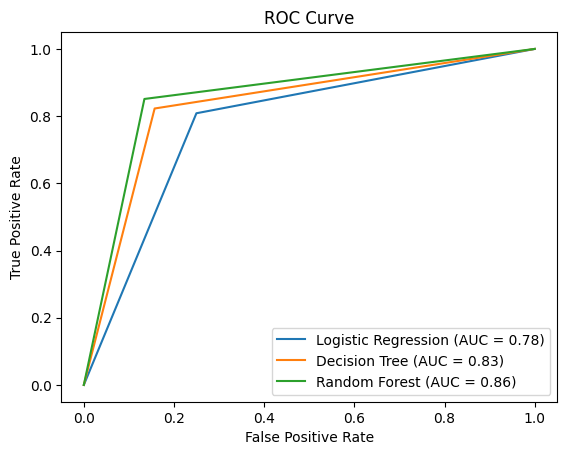

In [886]:
# Plot ROC curves for Logistic regression, KNN and Decision Tree on the same graph

# Plot the ROC curve for the Logistic Regression model

plt.plot(fpr_lg, tpr_lg,  label= 'Logistic Regression (AUC = %0.2f)' % AUC_lg)

# Plot the ROC curve for the Decision Tree model

plt.plot(fpr_dtc, tpr_dtc,  label='Decision Tree (AUC = %0.2f)' % AUC_dtc)

# Plot the ROC curve for the Random Forest model

plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = %0.2f)' % AUC_rfc)


# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add a legend
plt.legend()

# Show the plot
plt.show()